In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
help(gp2.KVNet2D)

Help on class KVNet2D in module gp2.gp2.classifiers.k_vnet2d:

class KVNet2D(gp2.gp2.classifiers.base_keras_segmentation_classifier.BaseKerasSegmentationClassifier)
 |  KVNet2D(input_size=(512, 512, 1), filter_num=None, n_labels=1, res_num_ini=1, res_num_max=2, activation='ReLU', output_activation='Sigmoid', batch_norm=True, pool=False, unpool=False, name='vnet', optimizer=None, loss=None, metric=None, verbose=False, workingdir='/tmp')
 |  
 |  KVNet2D for binary segmentation
 |  
 |  Method resolution order:
 |      KVNet2D
 |      gp2.gp2.classifiers.base_keras_segmentation_classifier.BaseKerasSegmentationClassifier
 |      gp2.gp2.classifiers.classifier.Classifier
 |      abc.ABC
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, input_size=(512, 512, 1), filter_num=None, n_labels=1, res_num_ini=1, res_num_max=2, activation='ReLU', output_activation='Sigmoid', batch_norm=True, pool=False, unpool=False, name='vnet', optimizer=None, loss=None, metric=None, 

In [4]:
R = Runner(verbose=True,
           classifier='kvnet2d',
           discriminator='cnn',
           filter_num=[16, 32, 64, 128],
           res_num_ini=1, 
           res_num_max=2, 
           activation='ReLU', 
           output_activation='Sigmoid', 
           batch_norm=True, 
           pool=False, 
           unpool=False,
           optimizer=None, 
           loss=None, 
           metric=None,
          )

*** GP2  KVNet2D ***
Working directory: /tmp/tmp0miwgh2nGP2
Verbose mode active!
{'verbose': True, 'workingdir': '/tmp/tmp0miwgh2nGP2', 'input_size': (512, 512, 1), 'filter_num': [16, 32, 64, 128], 'n_labels': 1, 'res_num_ini': 1, 'res_num_max': 2, 'activation': 'ReLU', 'output_activation': 'Sigmoid', 'batch_norm': True, 'pool': False, 'unpool': False, 'name': 'vnet', 'optimizer': <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f224636b7c0>, 'loss': <function binary_crossentropy at 0x7f224667cd30>, 'metric': [<function Util.dice_coeff at 0x7f2246f94790>], 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7f22387c4d30>}
Model summary:
Model: "vnet_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
___

In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_masks.npy')

In [6]:
images = images[:6000]
masks = masks[:6000]

In [7]:
images.shape

(6000, 512, 512, 1)

In [8]:
masks.shape

(6000, 512, 512, 1)

In [9]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [10]:
R.run(images=images, masks=masks, weights=weights, runs=8)

Weights OK!
******
Loop 1
Epoch 1/100
5/5 [==============================] - 20s 3s/step - loss: 0.7740 - dice_coeff: 0.2021 - val_loss: 0.6782 - val_dice_coeff: 0.2400
Epoch 2/100
5/5 [==============================] - 5s 1s/step - loss: 0.6108 - dice_coeff: 0.2863 - val_loss: 0.6673 - val_dice_coeff: 0.2453
Epoch 3/100
5/5 [==============================] - 5s 1s/step - loss: 0.5055 - dice_coeff: 0.3682 - val_loss: 0.6490 - val_dice_coeff: 0.2507
Epoch 4/100
5/5 [==============================] - 5s 1s/step - loss: 0.4284 - dice_coeff: 0.4457 - val_loss: 0.6310 - val_dice_coeff: 0.2539
Epoch 5/100
5/5 [==============================] - 5s 1s/step - loss: 0.3617 - dice_coeff: 0.5245 - val_loss: 0.6143 - val_dice_coeff: 0.2557
Epoch 6/100
5/5 [==============================] - 5s 1s/step - loss: 0.3107 - dice_coeff: 0.5957 - val_loss: 0.5984 - val_dice_coeff: 0.2568
Epoch 7/100
5/5 [==============================] - 5s 1s/step - loss: 0.2762 - dice_coeff: 0.6481 - val_loss: 0.5824 - va

In [11]:
R.classifier_scores

[[0.4424653649330139, 0.2733153700828552],
 [0.3980766534805298, 0.2643583118915558],
 [0.3950277268886566, 0.24495473504066467],
 [0.43985792994499207, 0.1918932944536209],
 [0.4618648588657379, 0.17477577924728394],
 [0.5184342861175537, 0.16016894578933716],
 [0.44070976972579956, 0.31046849489212036],
 [0.3380056619644165, 0.48392459750175476]]

In [12]:
R.discriminator_scores

[[2.470823710609693e-05, 1.0],
 [5.139383574714884e-05, 1.0],
 [7.976366305229021e-07, 1.0],
 [0.01075794082134962, 0.9972222447395325],
 [0.002673221053555608, 0.9972222447395325],
 [0.01294263731688261, 0.9972222447395325],
 [6.876127243041992, 0.8583333492279053],
 [14.008524894714355, 0.769444465637207]]

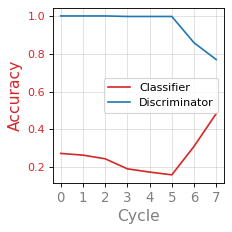

In [13]:
R.plot()